<a href="https://colab.research.google.com/github/tarun-allaparti/MCdislocations-radialpair/blob/master/MCdislocations%2Bradialpair.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:

import numpy as np
import matplotlib.pyplot as plt
import random
from numba import jit
import time
tic = time.clock()
B = 3*(10**-10) # burgers vector length in meters
G = 57*(10**9) # shear modulus in Pa
Ro = 10
iterations = 100
E = np.zeros(iterations)
cells = np.ones((10,10))   
# def create():              
while cells.sum() > 0:
    i = int(np.random.random()*10)
    j = int(np.random.random()*10)
    if cells[i][j] == 1:
        cells[i][j] = -1       
cells

array([[-1.,  1., -1.,  1., -1., -1.,  1., -1., -1.,  1.],
       [ 1.,  1.,  1.,  1., -1., -1., -1., -1.,  1., -1.],
       [-1.,  1.,  1., -1.,  1., -1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.],
       [-1.,  1.,  1., -1., -1.,  1.,  1.,  1., -1., -1.],
       [-1., -1.,  1., -1.,  1., -1., -1., -1.,  1.,  1.],
       [-1., -1.,  1., -1., -1., -1., -1., -1., -1., -1.],
       [ 1.,  1.,  1.,  1.,  1.,  1., -1., -1.,  1., -1.],
       [-1., -1., -1.,  1., -1.,  1., -1.,  1., -1., -1.],
       [ 1.,  1., -1.,  1., -1., -1., -1.,  1., -1.,  1.]])

In [0]:
@jit(nopython = True)
def energy(box):
    e = 0
    for i in np.arange(10):
        for j in np.arange(10):
            for a in np.arange(10):
                for c in np.arange(10):
                    if i != a or j != c:
                        r = np.sqrt(((i-a)**2)+((j-c)**2))
                        e = e+(G*B**2)*(1/(4*np.pi))*box[i][j]*box[a][c]*np.log(Ro/r)
    return e 

-2.6003055961329137e-08
-9.30625460470299e-08


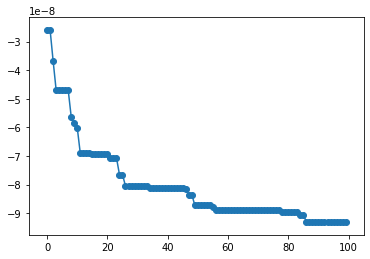

In [19]:
swap = np.array(cells)
for n in range(iterations):
    swap_test = np.array(swap)
    e_i = energy(swap)
    flat = swap_test.flatten()
    neg = np.where(flat == -1)
    pos = np.where(flat == 1)
    i = int(np.random.random()*10)
    j = int(np.random.random()*10)
    test = swap_test[i][j]
    if test == 1:
        x = int(np.random.random()*50)
        y = neg[0][x]
        a = int(y/10)
        b = np.mod(y,10)
        swap_test[i][j] = -1
        swap_test[a][b] = 1

    elif test == -1:
        x = int(np.random.random()*50)
        y = pos[0][x]
        a = int(y/10)
        b = np.mod(y,10)
        swap_test[i][j] = 1
        swap_test[a][b] = -1
        
    e_f = energy(swap_test)
    
    if e_f < e_i:
        swap = np.array(swap_test)
        E[n] = e_f
    else:
        E[n] = e_i
        
#     swap[i][j] = -swap[i][j]
#     swap[a][b] = -swap[a][b]
#     condition = energy(cells) - energy(swap)
print(energy(cells))
print(energy(swap))

plt.plot(E)
plt.scatter(np.arange(iterations),E)

In [0]:
dr = 0.2
rmax = 7
N = 100
dens = 1

rdfopp = np.zeros((100,int(rmax/dr)-1))

for i in range(10):
    for j in range(10):
        distance = np.zeros((10,10))
        for k in range(10):
            for l in range(10):
                distance[k,l] = np.sqrt(((i-k)**2)+(j-l)**2)
                #distance is set to -1 for positions with like sign
                if swap[i,j] == swap[k,l]:
                    distance[k,l] = -1
                
        ref = dr
        for m in range(int(rmax/dr)-1):
            rlow = ref+m*dr
            rhigh = rlow+dr
           
            uppershell = distance[distance < rhigh]
            shell = uppershell[uppershell > rlow]
            
            first_ind = j+i*10
            rdfopp[first_ind,m] = shell.size/(N*2*np.pi*rlow*dr)
        

In [0]:
dr = 0.2
rmax = 7
N = 100
dens = 1

rdflike = np.zeros((100,int(rmax/dr)-1))

for i in range(10):
    for j in range(10):
        distance = np.zeros((10,10))
        for k in range(10):
            for l in range(10):
                distance[k,l] = np.sqrt(((i-k)**2)+(j-l)**2)
                #distance is set to -1 for positions with opposite sign
                if swap[i,j] != swap[k,l]:
                    distance[k,l] = -1
                
        ref = dr
        for m in range(int(rmax/dr)-1):
            rlow = ref+m*dr
            rhigh = rlow+dr
           
            uppershell = distance[distance < rhigh]
            shell = uppershell[uppershell > rlow]
            
            first_ind = j+i*10
            rdflike[first_ind,m] = shell.size/(N*2*np.pi*rlow*dr)
        

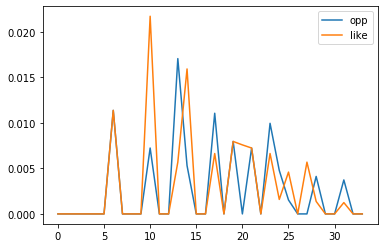

In [22]:
plt.plot(rdfopp[54,:],label = 'opp')
plt.plot(rdflike[54,:], label = 'like')
plt.legend()

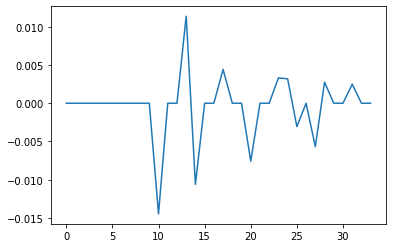

In [23]:
plt.plot(rdfopp[54,:]-rdflike[54,:])

In [24]:
toc = time.clock()
print(toc-tic)
# With Numba:  About 2-2.5 seconds to run entire code
# Without Numba: About 20-30 seconds to run entire code
# Numba, in this scenario, makes the program run about 10 times as fast!

1.2307109999999994
